<a href="https://colab.research.google.com/github/StetskoSergey/algotrade/blob/main/Test_POC_VAH_VAL_var5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Кластерный анализ основан на понимании того, что первичен объем сделок, а цена вторична. Т.к. именно объемы спроса и предложения заставляют цену двигаться в том или ином направлении. Кластерный анализ возможен для многогранного применения, поработаем над применением его ключевых возможностей:

Ранний вход в сделку Выход из сделки Фильтр убыточных сделок. Т.к. главная задача трейдера состоит в том, чтобы сберечь свой депозит, а не заработать, то начнем с описания алгоритма фильтрации убыточных сделок. Алгоритм описывает порядок действий, которые позволяют классифицировать свечу согласно определенным правилам и на основе классификации свечи принимать решение о том, входить в сделку или в сделку не входить. Кластерный анализ применим на любом ТФ (тайм-фрейм). Основные определения:

POC (Point of Control) – цена актива (инструмента), по который был проторгован максимальный объем (совместно покупателями и продавцами) в интервале времени формирования свечи, в диапазоне от Low до High свечи.

VAH (value area high) – верхняя граница стоимости

VAL(value area low) – нижняя граница стоимости

Область между VAL и VAH называется областью баланса, включает в себя 68% всего объема сделок по данной свече; включает в себя POC.

Немного подробнее об этих параметрах можно посмотреть по ссылке: https://atas.net/ru/obemnyj-analiz/osnovi-obyomnogo-analiza/profil-obema-3-veshchi-sposobnye-uluchshit-trejding/

Таблица классификации свечей в кластерном анализе основана на расположении POC относительно значений Open и Close свечи.

Посмотреть Таблицу классификации свечей и подробнее узнать о кластерном анализе можно по ссылке: https://skillblog.ru/trejding-i-investirovanie/klasternyj-analiz-v-trejdinge-osnovy-patterny-i-programmy.html

Кроме параметров POC, VAH, VAL, есть еще полезный параметр Delta = ASK - BID, - разница между проторгованными объемами продавцов и покупателей.

• quote_asset_volume: это объем торговли в котируемой валюте. Котируемая валюта обычно указывается второй в паре торговых инструментов и используется для оценки стоимости базовой валюты. Например, если пара торговых инструментов - BTC/USDT, то USDT является котируемой валютой, а объем торговли в USDT указывает на количество USDT, которое было использовано в сделках с BTC.

• number_of_trades: это количество сделок, которые были выполнены за определенный период времени.

• taker_buy_base_asset_volume: это объем базовой валюты, купленной на бирже по цене, установленной маркет-мейкерами (биржей) в момент сделки. Термин "тейкер" обычно относится к тому, кто совершает сделку по уже имеющейся цене на рынке, в отличие от "мейкера", который предлагает свою цену для сделки.

• taker_buy_quote_asset_volume: это объем котируемой валюты, потраченный тейкером на покупку базовой валюты.

In [ ]:
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.4 MB/s eta 0:00:00


В самом конце этого colab находится код, который расчитывает такие параметры для свечей, как POC, VAH, VAL, VWAP, Delta и kval, - квалификация свечей согласно принятой методологии в кластерном анализе.

VWAP - интегральный индикатор, который показывает степень переоценки или недооценки торгуемого инструмента: если при торговлен на ТФ 1H (1 час) цена выше уровня VWAP недельной свечи, значит инструмент переоценен; и наооборот, если цена ниже уровня VWAP, - инструмент не дооценен.

POC, VAH, VAL - на недельной свече при торговле ТФ 1H определяют уровни поддержки и уровни сопротивления для движения цены часовых свечей; причем, POC, - наиболее значим из них.

Delta - ее отрицательное значение говорит о том, что в рамках торгуемого интервала времени больший объем сделок остался за покупателями, т.е. спрос превышает предложение, и что на следующем интервале времени вероятно можно ожидать продолжения роста цены; и наооборот, - положительное значение параметра говорит о том, предложение превышает спрос и вероятно, что цена может дальше снижаться.

Kval, - квалификация свечи в кластерном анализе проводится по положению цены POC относительно цен low, high, open, close свечи; приняты следующие обозначения:

DU1, DU2, DU3 - бычья толчковая свеча; причем, DU1 более сильная, чем DU2, DU2 более сильная, чем DU3.

DD1, DD2, DD3 - медвежья толчковая свеча; причем, DD1 более сильная, чем DD2, DD2 более сильная, чем DD3.

SU1, SU2, SU3 - бычья тормозная свеча; причем, SU1 более сильная, чем SU2, SU2 более сильная, чем SU3.

SD1, SD2, SD3 - медвежья тормозная свеча; причем, SD1 более сильная, чем SD2, SD2 более сильная, чем SD3.

MID - свеча нейтральная.

Оценку свечи по параметру kval имеет смысл делать только для тех свечей, которые называются пробойными. Например, свеча открылась (open) под уровнем сопротивления (POC, VAH или VAL свечи на старшем ТФ), а закрылась (close) над этим уровнем, - говорят, что свеча пробила уровень сопротивления. Аналогично, свеча открылась над уровнем поддержки, а закрылась под ней, - говорят, что свеча пробила уровень поддержки. Если свеча пробила, например, уровень сопротивления, тогда значение параметра kval для этой свечи помогает оценить вероятность дальнейшего движения цены.

Если свеча квалифицирована, как DU - бычья толчковая, то вероятно дальнейшее повышение цены.

Если свеча квалифицирована, как DD - медвежья толчковая, то вероятно дальнейшее снижение цены.

Если свеча квалифицирована, как SU - бычья тормозная, то вероятно дальнейшее торможение для повышения цены.

Если свеча квалифицирована, как SD - медвежья тормозная, то вероятно дальнейшее торможение для снижения цены.

Если свеча квалифицирована, как MID - нейтральная, ее не стоит рассматривать; в этом случае анализируется параметр kval следующей по времени свечи.

In [ ]:
import requests
import pandas as pd
import numpy as np
import datetime
import time
import os
import sys
import io
import mplfinance as mpf
import matplotlib.pyplot as plt

In [ ]:
# v1, v2, v3 - обозначения серверов Binance в url, через которые можно скачивать данные
def get_binance_klines(rialto, symbol, interval, start_date, end_date):
        """
        Функция для получения и сохранения котировок по торговой паре на бирже Binance
        symbol - торговая пара
        interval - интервал запроса ('1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M')
        start_date - дата начала получения данных в формате (год, месяц, день)
        end_date - дата окончания получения данных в формате (год, месяц, день)
        """
        start_date = datetime.datetime(*start_date)
        start_timestamp = int(start_date.timestamp() * 1000)

        end_date = datetime.datetime(*end_date)
        end_timestamp = int(end_date.timestamp() * 1000)

        klines = []
        limit = 1000  # максимальное количество строк за один запрос

        while True:
            # Запросить данные по торгам
            # url = f'https://binance.com/{rialto}/v1/klines?symbol={symbol}&interval={interval}&startTime={start_timestamp}&endTime={end_timestamp}&limit={limit}'
            url = f'https://binance.com/{rialto}/v3/klines?symbol={symbol}&interval={interval}&startTime={start_timestamp}&endTime={end_timestamp}&limit={limit}'
            response = requests.get(url)

            if response.status_code == 200:
                # Данные получены успешно
                data = response.json()
                if not data:  # Если данные закончились, выходим из цикла
                    break
                klines += data
                start_timestamp = int(data[-1][0]) + 1  # Новая начальная дата - на 1 больше, чем предыдущая конечная дата
            else:
                print(f'Ошибка при получении данных. Код ошибки: {response.status_code}')
                return None
            time.sleep(3)  # Добавляем задержку между запросами

        # Преобразуем данные в датафрейм
        df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

        # Преобразуем timestamp в дату
        df['date'] = pd.to_datetime(df['timestamp'] / 1000, unit='s')

        df[['high', 'low', 'close', 'open', 'volume']] = df[['high', 'low', 'close', 'open', 'volume']].astype(float)
        df['avg_price'] = round((df['open'] + df['close']) / 2,0).astype(int)

        # Удаляем ненужные столбцы
        #df.drop(columns=['timestamp', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_quote_asset_volume', 'taker_buy_base_asset_volume','ignore'], inplace=True)
        df.drop(columns=['timestamp', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_quote_asset_volume', 'ignore'], inplace=True)


        # df.drop(columns=['ignore'], inplace=True)
        return df


In [ ]:
#получаем секундные свечи ВАЖНО - так как секундные свечи есть только на спотовой торговле то берем данные именно из нее, а не из фьючерсной
symbol = 'BTCUSDT'
interval = '1s'
rialto = 'api' #определяем по каким свечам запрос, для спотовых значение "аpi", для фьючерсных "fapi"
    # start_date = (2023, 4, 2, 23, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
    # end_date = (2023, 4, 2, 23, 59, 59)
# start_date = (2023, 6, 6, 9, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
# end_date = (2023, 6, 6, 16, 59, 59)
# start_date = (2023, 6, 8, 6, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
# end_date = (2023, 6, 8, 14, 59, 59)
# start_date = (2023, 6, 13, 0, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
# end_date = (2023, 6, 13, 23, 59, 59)
# start_date = (2023, 6, 13, 0, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
# end_date = (2023, 6, 23, 23, 59, 59)
start_date = (2023, 6, 26, 0, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
end_date = (2023, 6, 26, 23, 59, 59)
print('Запущен сбор секундных свечей')

sec_data = get_binance_klines(rialto, symbol, interval, start_date, end_date)
print('Сбор секундных свечей окончен')

# Записываем данные в test_df.csv
sec_data.to_csv('sec_data.csv', mode='a', index=False)
# Выводим информацию о том, что данные сохранены
print(f'Данные успешно добавлены в файл sec_data.csv')


In [ ]:
#получаем часовые свечи ВАЖНО - так как секундные свечи есть только на спотовой торговле то берем данные именно из нее, а не из фьючерсной
symbol = 'BTCUSDT'
interval = '1h'
rialto = 'api' #определяем по каким свечам запрос, для спотовых значение "аpi", для фьючерсных "fapi"
    # start_date = (2023, 4, 2, 23, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
    # end_date = (2023, 4, 2, 23, 59, 59)
# start_date = (2023, 6, 6, 9, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
# end_date = (2023, 6, 6, 16, 59, 59)
# start_date = (2023, 6, 8, 6, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
# end_date = (2023, 6, 8, 14, 59, 59)
# start_date = (2023, 6, 13, 0, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
# end_date = (2023, 6, 13, 23, 59, 59)
start_date = (2023, 6, 13, 0, 0, 0) #дата начала запроса в формате год, месяц, день, час, минута, секунда
end_date = (2023, 6, 23, 23, 59, 59)

print('Запущен сбор часовых свечей')

hours_data = get_binance_klines(rialto, symbol, interval, start_date, end_date)
print('Сбор часовых свечей окончен')

# Записываем данные в test_df.csv
hours_data.to_csv('hours_data.csv', mode='a', index=False)
# Выводим информацию о том, что данные сохранены
print(f'Данные успешно добавлены в файл hours_data.csv')


In [ ]:
hours_data = pd.read_csv('hours_data.csv')
print(hours_data.to_string(index=False))

In [ ]:
# sec_data = pd.read_csv('sec_data_1306.csv')
sec_data = pd.read_csv('sec_data_2606.csv')
# print(sec_data.to_string(index=False))
sec_data[:30]

,open,high,low,close,volume,taker_buy_base_asset_volume,date,avg_price
0,30462.67,30462.67,30462.66,30462.66,0.40317,0.00633,2023-06-26 00:00:00,30463
1,30462.66,30462.67,30462.66,30462.67,5.79159,0.00098,2023-06-26 00:00:01,30463
2,30462.66,30462.67,30462.66,30462.67,0.58725,0.00675,2023-06-26 00:00:02,30463
3,30462.67,30468.11,30462.67,30468.11,4.20843,4.20843,2023-06-26 00:00:03,30465
4,30468.11,30468.11,30468.10,30468.11,0.14780,0.01020,2023-06-26 00:00:04,30468
5,30468.10,30468.11,30465.39,30465.39,1.17274,0.00102,2023-06-26 00:00:05,30467
6,30465.39,30465.40,30465.39,30465.39,0.06834,0.00065,2023-06-26 00:00:06,30465
7,30465.39,30465.39,30462.95,30462.95,1.11561,0.00000,2023-06-26 00:00:07,30464
8,30462.95,30462.96,30462.95,30462.96,0.05615,0.04634,2023-06-26 00:00:08,30463
9,30462.96,30462.96,30462.95,30462.95,0.00998,0.00820,2023-06-26 00:00:09,30463


In [ ]:
# Вычисление delta = ask-bid
import pandas as pd
# Загрузка данных секундных свечей
sec_data = pd.read_csv('sec_data_2606.csv')

# Преобразование столбца 'date' в формат datetime
sec_data['date'] = pd.to_datetime(sec_data['date'])

# Замена имени столбца 'taker_buy_base_asset_volume' на 'ask'
sec_data.rename(columns={'taker_buy_base_asset_volume': 'ask'}, inplace=True)

# Группировка данных по каждому часу
hourly_data = sec_data.resample('1H', on='date').agg({
    'high': 'max',
    'low': 'min',
    'open': 'first',
    'close': 'last',
    'volume': 'sum',
    'ask': 'sum'
})

# Переименование столбца 'date' в 'date_sec'
hourly_data.rename(columns={'date': 'date_sec'}, inplace=True)

# Вычисление столбца 'delta' (ask - bid)
hourly_data['delta'] = hourly_data['ask'] - (hourly_data['volume'] - hourly_data['ask'])

# Добавление столбца 'date' в начало датафрейма
hourly_data.insert(0, 'date', hourly_data.index)

# Вывод полученного датафрейма
print(hourly_data.to_string(index=False))

               date     high      low     open    close     volume        ask      delta
2023-06-26 00:00:00 30550.00 30391.75 30462.67 30394.89 1453.76516  684.67457  -84.41602
2023-06-26 01:00:00 30405.56 29963.60 30394.88 30172.74 5025.23679 2362.72589 -299.78501
2023-06-26 02:00:00 30240.00 30115.77 30172.73 30222.48 1328.30002  718.74290  109.18578
2023-06-26 03:00:00 30328.63 30177.38 30222.48 30296.36 1400.57854  915.61047  430.64240
2023-06-26 04:00:00 30323.99 30214.30 30296.35 30245.17 1075.49423  524.70074  -26.09275
2023-06-26 05:00:00 30272.93 30164.79 30245.18 30215.05  923.87173  378.27956 -167.31261
2023-06-26 06:00:00 30486.23 30194.59 30215.04 30483.97 1882.17156 1045.62317  209.07478
2023-06-26 07:00:00 30580.00 30283.00 30483.97 30404.29 2925.00908 1562.05086  199.09264
2023-06-26 08:00:00 30428.36 30323.37 30404.28 30405.75 1461.71860  706.05940  -49.59980
2023-06-26 09:00:00 30420.14 30245.88 30405.76 30268.00 1428.10021  697.44758  -33.20505
2023-06-26 10:00:00 3

In [ ]:
# 11:58 Этот код применяется в основной программе, здесь он используется для того, чтобы вывести на печать и посмотреть
# обработанные первичные данные о параметрах свечей, на основании которых строятся вычисления всех выходных параметров.
# В датафрейме sec_data для каждой величины avg_price, находящейся в пределах одного часа,
# суммируем величины volume в переменную total_volume и записываем данные о параметрах date, avg_price  и  total_volume в
# датафрейм grouped.

import pandas as pd
import numpy as np

# Загрузка данных из файла sec_data.csv
# sec_data = pd.read_csv('sec_data_1306.csv')
sec_data = pd.read_csv('sec_data_2606.csv')

# Преобразование столбца 'date' в формат datetime
sec_data['date'] = pd.to_datetime(sec_data['date'])

# Вычисление значения параметра 'avg_price' для каждой секундной свечи
sec_data['avg_price'] = (sec_data['open'] + sec_data['close']) / 2
sec_data['avg_price'] = sec_data['avg_price'].round().astype(int)

# Группировка и агрегация данных по каждому часу.
grouped = sec_data.groupby([pd.Grouper(key='date', freq='1h'), 'avg_price']).agg({
    'volume': 'sum'
}).reset_index()

# Вывод данных на печать
print(grouped[['date', 'avg_price', 'volume']].to_string(index=False))

               date  avg_price    volume
2023-06-26 00:00:00      30394   0.10217
2023-06-26 00:00:00      30395   3.73404
2023-06-26 00:00:00      30396   4.40195
2023-06-26 00:00:00      30397   6.07801
2023-06-26 00:00:00      30399   9.46796
2023-06-26 00:00:00      30401   4.46114
2023-06-26 00:00:00      30402  21.61759
2023-06-26 00:00:00      30403  15.23581
2023-06-26 00:00:00      30404   5.44050
2023-06-26 00:00:00      30405  13.20906
2023-06-26 00:00:00      30406   7.02787
2023-06-26 00:00:00      30407   3.96202
2023-06-26 00:00:00      30408   2.36336
2023-06-26 00:00:00      30409   6.17021
2023-06-26 00:00:00      30410   4.74723
2023-06-26 00:00:00      30411   4.90886
2023-06-26 00:00:00      30412   3.54502
2023-06-26 00:00:00      30413   3.16081
2023-06-26 00:00:00      30414   7.72208
2023-06-26 00:00:00      30415   8.92030
2023-06-26 00:00:00      30416   6.25080
2023-06-26 00:00:00      30417   9.45165
2023-06-26 00:00:00      30418  13.94539
2023-06-26 00:00

In [ ]:
## scaler = 4 19:21 Это вспомогательный код, чтобы проверить как работает scaler.
## Подготовка данных для определения POC для часовых, дневных, недельных свечей основана
## группировке данных avg_price  и  volume в датафрейме grouped (см. код выше) в соответствии
## со значением параметра scaler. Общая логика следующая. В часе, например, в нулевом часе 13 июня 2023 года (см. предыдущий код)
## 202 строки с исходными данными date,  avg_price, volume: 2023-06-13 00:00:00      26032   3.43097.
## Значение параметра scaler установлено, например, равным 4. Делим количество строк в часе (202) на значение scaler (4) получаем 50 целых и 2 в остатке.
## Т.к.  scaler равен 4, то в каждой группе должно обрабатываться по 4-е строки. Поэтому, от значения scaler (4) отнимаем остаток 2 и получаем 4-2=2 ,
## т.е. к последним двум строкам из 202 нам надо добавить в группу еще две предыдущие строки, чтобы всего было 4-е строки.
## Значение scaler ограничено только здравым смыслом. Этот код проверен для разных значений scaler вручную. Когда scaler равен 1, тогда каждая строка
## в датафрейме grouped (см. код выше) будет участвовать в определении POC.

import pandas as pd

# Загрузка данных из файла sec_data.csv
# sec_data = pd.read_csv('sec_data_1306.csv')
sec_data = pd.read_csv('sec_data_2606.csv')

# Преобразование столбца 'date' в формат datetime
sec_data['date'] = pd.to_datetime(sec_data['date'])

# Вычисление значения параметра 'avg_price' для каждой секундной свечи
sec_data['avg_price'] = (sec_data['open'] + sec_data['close']) / 2
sec_data['avg_price'] = sec_data['avg_price'].round().astype(int)

# Группировка данных по каждому часу
grouped = sec_data.groupby([pd.Grouper(key='date', freq='1h'), 'avg_price']).agg({
    'volume': 'sum'
}).reset_index()

# Устанавливаем значение параметра scaler
scaler = 10

# Создаем пустой DataFrame для сохранения рассчитанных значений
new_dataframe = pd.DataFrame(columns=['date', 'avgprc_scaler', 'Volume_scaler', 'scaler'])

# Цикл по группам данных каждого часа
for _, group in grouped.groupby('date'):
    # Разбивка группы на окна размером scaler
    windows = [group.iloc[i:i+scaler] for i in range(0, len(group), scaler)]

    # Дополнение последней группы до размера scaler, если необходимо
    last_group = windows[-1]
    if len(last_group) < scaler:
        remaining = scaler - len(last_group)
        previous_rows = group.iloc[-remaining-2:-2].copy()
        last_group = pd.concat([previous_rows, last_group])
        windows[-1] = last_group

    # Вычисление значений для каждого окна
    for window in windows:
        avgprc_scaler = window['avg_price'].mean()
        Volume_scaler = window['volume'].sum()

        # Создаем новую строку с рассчитанными значениями
        new_row = {
            'date': window.iloc[-1]['date'],
            'avgprc_scaler': avgprc_scaler,
            'Volume_scaler': Volume_scaler,
            'scaler': scaler
        }

        # Добавляем новую строку в новый DataFrame
        new_dataframe = pd.concat([new_dataframe, pd.DataFrame([new_row])], ignore_index=True)

# Выводим результаты
# print(new_dataframe)

print(new_dataframe.to_string(index=False))


               date  avgprc_scaler  Volume_scaler scaler
2023-06-26 00:00:00        30399.6       83.74823     10
2023-06-26 00:00:00        30410.5       52.52776     10
2023-06-26 00:00:00        30420.5       84.02883     10
2023-06-26 00:00:00        30430.5      126.00534     10
2023-06-26 00:00:00        30440.5      119.82725     10
2023-06-26 00:00:00        30450.5      117.15458     10
2023-06-26 00:00:00        30460.5       69.79035     10
2023-06-26 00:00:00        30470.5      104.70309     10
2023-06-26 00:00:00        30480.5       72.46046     10
2023-06-26 00:00:00        30490.5       94.63928     10
2023-06-26 00:00:00        30500.5      170.47662     10
2023-06-26 00:00:00        30510.5      115.45022     10
2023-06-26 00:00:00        30520.5      114.53862     10
2023-06-26 00:00:00        30530.5       88.82874     10
2023-06-26 00:00:00        30541.3       31.73687     10
2023-06-26 00:00:00        30545.8       19.53364     10
2023-06-26 01:00:00        2999

               date     high      low     open    close     volume     poc  poc_value  vwap   val   vah
2023-06-26 00:00:00 30550.00 30391.75 30462.67 30394.89 1453.76516 30500.5  170.47662 30471 30427 30517
2023-06-26 01:00:00 30405.56 29963.60 30394.88 30172.74 5025.23679 30186.5  415.36404 30181 30081 30307
2023-06-26 02:00:00 30240.00 30115.77 30172.73 30222.48 1328.30002 30191.5  227.63765 30180 30140 30212
2023-06-26 03:00:00 30328.63 30177.38 30222.48 30296.36 1400.57854 30184.4  348.34074 30233 30188 30281
2023-06-26 04:00:00 30323.99 30214.30 30296.35 30245.17 1075.49423 30248.5  209.21368 30259 30234 30290
2023-06-26 05:00:00 30272.93 30164.79 30245.18 30215.05  923.87173 30237.5  172.52290 30220 30196 30242
2023-06-26 06:00:00 30486.23 30194.59 30215.04 30483.97 1882.17156 30284.5  150.97076 30321 30223 30416
2023-06-26 07:00:00 30580.00 30283.00 30483.97 30404.29 2925.00908 30403.5  256.22317 30450 30349 30538
2023-06-26 08:00:00 30428.36 30323.37 30404.28 30405.75 1461.718

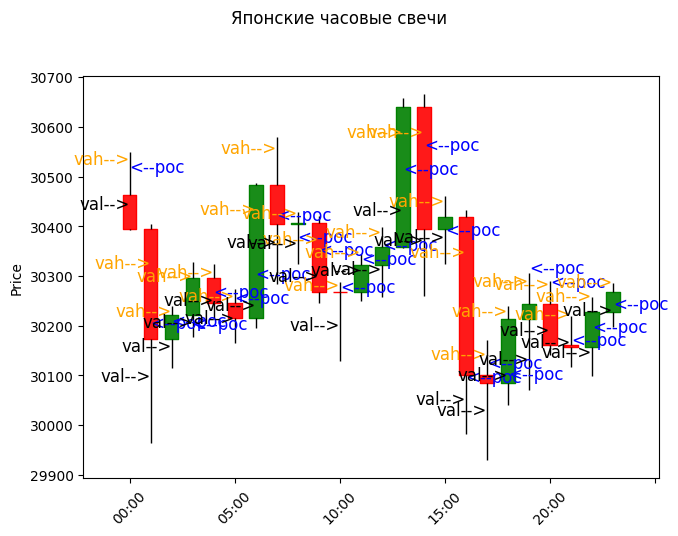

In [ ]:
# 8:57 20.06.2023 Это почти основной код для вычисления POC, VWAP, VAH, VAL. Данные о секундных свечах для 24-х часов обрабатываются на colab за 8-9 секунд.
# В коде есть небольшая избыточность, формируются два одинаковых датафрейма grouped и grouped_vah_val, но для разных задач; оптимизацию не делал.
# Вычисление значений poc для часовых свечей на основе секундных свечей со scaler (scaler=4).Добавляем вычисление VAH, VAL
# Значения scaler может быть любым, но рекомендуется выбирать из ряда 1, 2, 3, 4, 5, 6, 8, 10; подбирать в зависимости от ТФ свечи и актива.

import pandas as pd
import numpy as np
# 0:37
# Загрузка данных из файла sec_data.csv
# sec_data = pd.read_csv('sec_data_1306.csv')
sec_data = pd.read_csv('sec_data_2606.csv')

# print(sec_data[:15].to_string(index=False))
# Преобразование столбца 'date' в формат datetime
sec_data['date'] = pd.to_datetime(sec_data['date'])
# print(sec_data[:35].to_string(index=False))
# Вычисление значения параметра 'avg_price' для каждой секундной свечи
sec_data['avg_price'] = (sec_data['open'] + sec_data['close']) / 2
sec_data['avg_price'] = sec_data['avg_price'].round().astype(int)

grouped = pd.DataFrame(columns=['date', 'avg_price',   'volume'])

# Группировка и агрегация данных по каждому часу
grouped = sec_data.groupby([pd.Grouper(key='date', freq='1h'), 'avg_price']).agg({
    'volume': 'sum'
}).reset_index()

# Устанавливаем значение параметра scaler
scaler = 10

# Создаем пустой DataFrame для сохранения рассчитанных значений
new_dataframe = pd.DataFrame(columns=['date', 'avgprc_scaler', 'Volume_scaler', 'scaler'])

# Цикл по группам данных каждого часа
for _, group in grouped.groupby('date'):
    # Разбивка группы на окна размером scaler
    windows = [group.iloc[i:i+scaler] for i in range(0, len(group), scaler)]

    # Дополнение последней группы до размера scaler, если необходимо
    last_group = windows[-1]
    if len(last_group) < scaler:
        remaining = scaler - len(last_group)
        previous_rows = group.iloc[-remaining-2:-2].copy()
        last_group = pd.concat([previous_rows, last_group])
        windows[-1] = last_group

    # Вычисление значений для каждого окна
    for window in windows:
        avgprc_scaler = window['avg_price'].mean()
        Volume_scaler = window['volume'].sum()

        # Создаем новую строку с рассчитанными значениями
        new_row = {
            'date': window.iloc[-1]['date'],
            'avgprc_scaler': avgprc_scaler,
            'Volume_scaler': Volume_scaler,
            'scaler': scaler
        }

        # Добавляем новую строку в новый DataFrame
        new_dataframe = pd.concat([new_dataframe, pd.DataFrame([new_row])], ignore_index=True)


# Нахождение значениями 'avg_price' для которого величина 'volume' максимальна для данного часа
grouped_ad = new_dataframe.groupby(['date']).apply(lambda x: x.loc[x['Volume_scaler'].idxmax()]).reset_index(drop=True)

# Присвоение значения avgprc_scaler, соответствующего максимальному значению Volume_scaler, переменной poc
grouped_ad['poc'] = grouped_ad['avgprc_scaler']
grouped_ad['poc_value'] = grouped_ad['Volume_scaler']

# Замена названия столбца 'volume' на 'poc_value'
grouped_ad.rename(columns={'volume': 'poc_value'}, inplace=True)

# Группировка данных по каждому часу и агрегация параметров
hourly_data = sec_data.groupby(pd.Grouper(key='date', freq='H')).agg({
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'open': 'first',
    'volume': 'sum'
}).reset_index()

# Объединение данных из grouped в hourly_data
hourly_data = hourly_data.merge(grouped_ad[['date', 'poc', 'poc_value']], on='date', how='left')

############################################################################################ 0:34
# Инициализация выходного датафрейма с нужными столбцами
output_data = hourly_data[['date', 'high', 'low', 'open', 'close', 'volume', 'poc', 'poc_value']].copy()

# Расчет VWAP для каждого часа и округление до целого числа
hourly_vwap = sec_data.groupby(pd.Grouper(key='date', freq='H')).apply(lambda x: (x['avg_price'] * x['volume']).sum() / x['volume'].sum()).reset_index(name='vwap')
hourly_vwap['vwap'] = hourly_vwap['vwap'].round().astype(int)
output_data = output_data.merge(hourly_vwap, on='date', how='left')

# Вычисление VAH и VAL для каждого часа

grouped = pd.DataFrame(columns=['date', 'avg_price',   'volume'])

# Группировка и агрегация данных по каждому часу
grouped_vah_val = sec_data.groupby([pd.Grouper(key='date', freq='1h'), 'avg_price']).agg({
    'volume': 'sum'
}).reset_index()

# print(grouped.to_string(index=False))

# Создание дополнительных столбцов для хранения рассчитанных значений
grouped_vah_val['volume_total'] = grouped_vah_val.groupby('date')['volume'].transform('sum')
grouped_vah_val['cumulative_volume'] = grouped_vah_val.groupby('date')['volume'].cumsum()

# Рассчет параметров
grouped_vah_val['volume_016'] = grouped_vah_val['volume_total'] * 0.16
grouped_vah_val['volume_084'] = grouped_vah_val['volume_total'] * 0.84

# Функция для определения avg_price_1 и avg_price_2
def calculate_avg_price(row):
    date = row['date']
    cumulative_volume = row['cumulative_volume']
    volume_016 = row['volume_016']
    volume_084 = row['volume_084']

    # Выбор значений avg_price, удовлетворяющих условиям
    val = grouped_vah_val[(grouped_vah_val['date'] == date) & (grouped_vah_val['cumulative_volume'] >= volume_016)]['avg_price'].min()
    vah = grouped_vah_val[(grouped_vah_val['date'] == date) & (grouped_vah_val['cumulative_volume'] >= volume_084)]['avg_price'].min()

    return pd.Series({'val': val, 'vah': vah})

# Применение функции к каждой строке
grouped_vah_val[['val', 'vah']] = grouped_vah_val.apply(calculate_avg_price, axis=1)

# Удаление строк с одинаковыми значениями параметров в пределах каждого часа
grouped_vah_val = grouped_vah_val.drop_duplicates(subset=['date', 'val', 'val'])

output_data = output_data.merge(grouped_vah_val, on='date', how='left')

# Вывод данных на печать
columns_to_exclude = ['avg_price', 'volume_y', 'volume_total', 'cumulative_volume', 'volume_016', 'volume_084']
output_data_filtered = output_data.drop(columns=columns_to_exclude)
output_data_filtered = output_data_filtered.rename(columns={'volume_x': 'volume'})
print(output_data_filtered.to_string(index=False))

###########################################################

# Подготовка данных для построения японских свечей
ohlc = output_data[['date', 'open', 'high', 'low', 'close']]

# Установка индекса типа DatetimeIndex на DataFrame ohlc
ohlc.set_index('date', inplace=True)

# Настройка параметров графика
kwargs = dict(
    type='candle',
    style='yahoo',
    title='Японские часовые свечи с параметрами',
    ylabel='Цена',
    figsize=(296, 148),
    addplot=[
        mpf.make_addplot(output_data['vah'], linestyle='-', color='orange'),
        mpf.make_addplot(output_data['val'], linestyle='-', color='gray'),
        mpf.make_addplot(output_data['poc'], linestyle='-', color='green')
    ],
    alines=dict(hlines=output_data['poc'].tolist(), colors=['green'], linewidths=[1]),  # Отображение горизонтальных линий для POC
    returnfig=True  # Возвращение объекта Figure
)

# Создание стиля графика
mc = mpf.make_marketcolors(up='g', down='r', edge='inherit', volume='inherit')
s = mpf.make_mpf_style(marketcolors=mc)

# Построение графика с японскими свечами
fig, axes = mpf.plot(ohlc, type='candle', style=s, title='Японские часовые свечи', returnfig=True)

# Отображение значений POC в виде стрелки
for i, poc in enumerate(output_data['poc']):
    axes[0].text(i, poc, str('<--poc'), color='blue', ha='left', va='bottom', fontsize=12)

# Отображение значений VAH_vwap в виде стрелки
for i, vah_vwap in enumerate(output_data['vah']):
    axes[0].text(i, vah_vwap, str('vah-->'), color='orange', ha='right', va='bottom', fontsize=12)

# Отображение значений VAL_vwap в виде стрелки
for i, val_vwap in enumerate(output_data['val']):
    axes[0].text(i, val_vwap, str('val-->'), color='black', ha='right', va='bottom', fontsize=12)

# Настройка осей и меток
plt.xticks(rotation=45)
plt.ylabel('Цена')

# Показать график
plt.show()


               date     high      low     open    close       poc  poc_value  vwap   val   vah     volume        ask      delta kval
2023-06-26 00:00:00 30550.00 30391.75 30462.67 30394.89 30503.500  121.31644 30471 30427 30517 1453.76516  684.67457  -84.41602  DD1
2023-06-26 01:00:00 30405.56 29963.60 30394.88 30172.74 30185.500  388.70284 30181 30081 30307 5025.23679 2362.72589 -299.78501  MID
2023-06-26 02:00:00 30240.00 30115.77 30172.73 30222.48 30192.500  192.37313 30180 30140 30212 1328.30002  718.74290  109.18578  MID
2023-06-26 03:00:00 30328.63 30177.38 30222.48 30296.36 30182.875  345.55984 30233 30188 30281 1400.57854  915.61047  430.64240  DU1
2023-06-26 04:00:00 30323.99 30214.30 30296.35 30245.17 30241.500  162.36909 30259 30234 30290 1075.49423  524.70074  -26.09275  SD1
2023-06-26 05:00:00 30272.93 30164.79 30245.18 30215.05 30240.500  154.19572 30220 30196 30242  923.87173  378.27956 -167.31261  MID
2023-06-26 06:00:00 30486.23 30194.59 30215.04 30483.97 30283.500  11

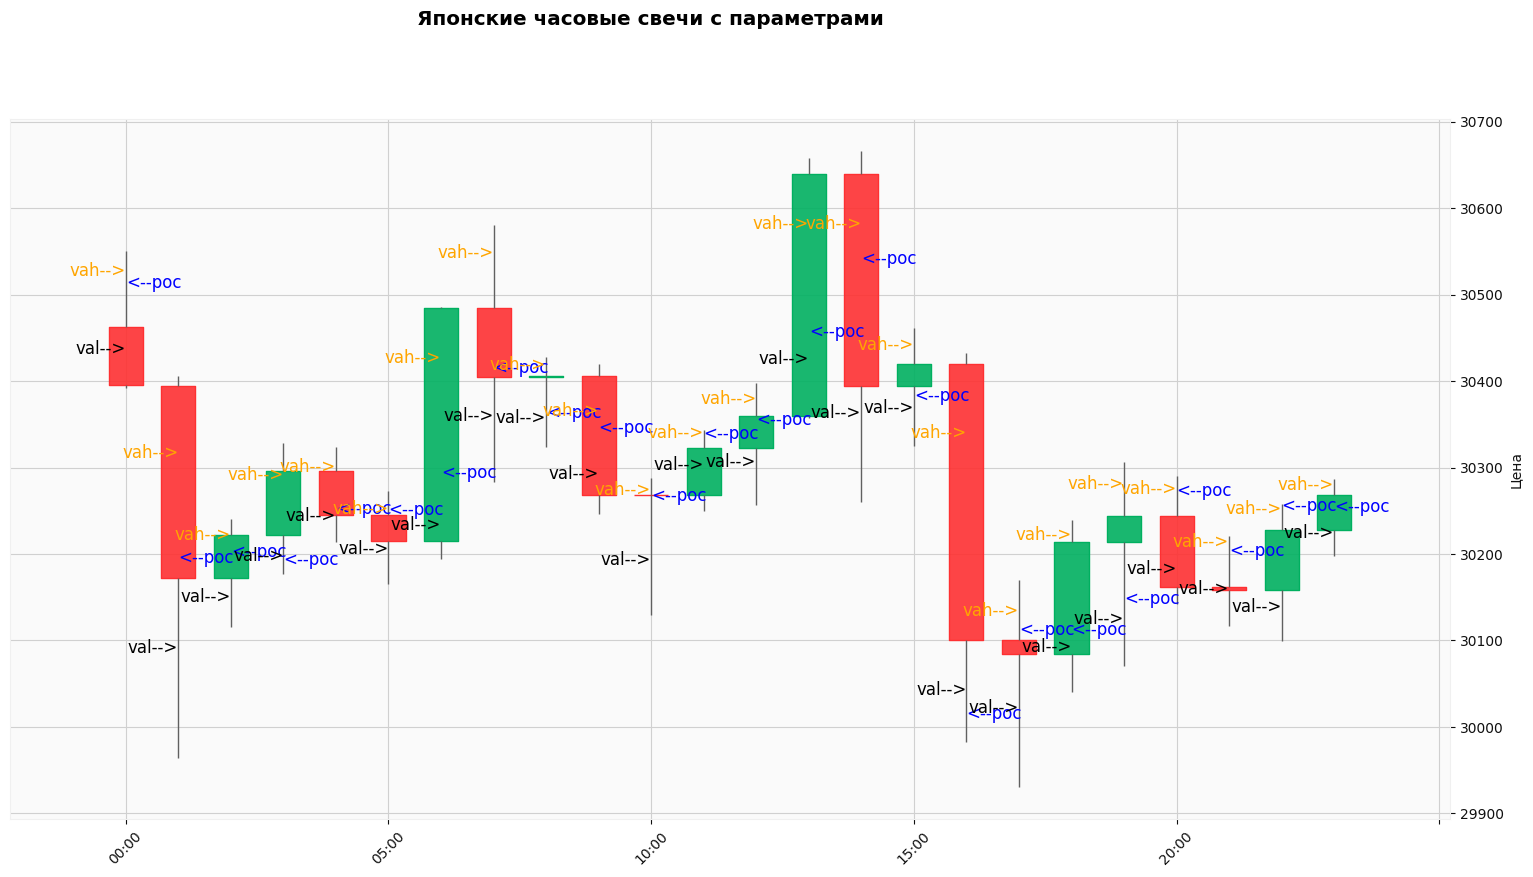

In [ ]:
# Это основной код 11:38 27.06.2023
import pandas as pd
import numpy as np
# 0:37

# Загрузка данных из файла sec_data.csv
sec_data = pd.read_csv('sec_data_2606.csv')

# Преобразование столбца 'date' в формат datetime
sec_data['date'] = pd.to_datetime(sec_data['date'])

# Замена имени столбца 'taker_buy_base_asset_volume' на 'ask'
sec_data.rename(columns={'taker_buy_base_asset_volume': 'ask'}, inplace=True)

# Вычисление значения параметра 'avg_price' для каждой секундной свечи
sec_data['avg_price'] = (sec_data['open'] + sec_data['close']) / 2
sec_data['avg_price'] = sec_data['avg_price'].round().astype(int)

grouped = pd.DataFrame(columns=['date', 'avg_price',   'volume'])

# Группировка и агрегация данных по каждому часу
grouped = sec_data.groupby([pd.Grouper(key='date', freq='1h'), 'avg_price']).agg({
    'volume': 'sum'
}).reset_index()

# print(grouped.to_string(index=False))

# Группировка данных по каждому часу
hourly_dlt = sec_data.resample('1H', on='date').agg({
    'volume': 'sum',
    'ask': 'sum'
}).reset_index()

# Вычисление столбца 'delta' (ask - bid)
hourly_dlt['delta'] = hourly_dlt['ask'] - (hourly_dlt['volume'] - hourly_dlt['ask'])

# Вывод полученного датафрейма
# print(hourly_dlt.to_string(index=False))

# Устанавливаем значение параметра scaler
scaler = 8

# Создаем пустой DataFrame для сохранения рассчитанных значений
new_dataframe = pd.DataFrame(columns=['date', 'avgprc_scaler', 'Volume_scaler', 'scaler'])

# Цикл по группам данных каждого часа
for _, group in grouped.groupby('date'):
    # Разбивка группы на окна размером scaler
    windows = [group.iloc[i:i+scaler] for i in range(0, len(group), scaler)]

    # Дополнение последней группы до размера scaler, если необходимо
    last_group = windows[-1]
    if len(last_group) < scaler:
        remaining = scaler - len(last_group)
        previous_rows = group.iloc[-remaining-2:-2].copy()
        last_group = pd.concat([previous_rows, last_group])
        windows[-1] = last_group

    # Вычисление значений для каждого окна
    for window in windows:
        avgprc_scaler = window['avg_price'].mean()
        Volume_scaler = window['volume'].sum()

        # Создаем новую строку с рассчитанными значениями
        new_row = {
            'date': window.iloc[-1]['date'],
            'avgprc_scaler': avgprc_scaler,
            'Volume_scaler': Volume_scaler,
            'scaler': scaler
        }

        # Добавляем новую строку в новый DataFrame
        new_dataframe = pd.concat([new_dataframe, pd.DataFrame([new_row])], ignore_index=True)


# Нахождение значениями 'avg_price' для которого величина 'volume' максимальна для данного часа
grouped_ad = new_dataframe.groupby(['date']).apply(lambda x: x.loc[x['Volume_scaler'].idxmax()]).reset_index(drop=True)

# Присвоение значения avgprc_scaler, соответствующего максимальному значению Volume_scaler, переменной poc
grouped_ad['poc'] = grouped_ad['avgprc_scaler']
grouped_ad['poc_value'] = grouped_ad['Volume_scaler']

# Замена названия столбца 'volume' на 'poc_value'
grouped_ad.rename(columns={'volume': 'poc_value'}, inplace=True)

# Группировка данных по каждому часу и агрегация параметров
hourly_data = sec_data.groupby(pd.Grouper(key='date', freq='H')).agg({
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'open': 'first',
    'volume': 'sum'
}).reset_index()

# Объединение данных из grouped в hourly_data
hourly_data = hourly_data.merge(grouped_ad[['date', 'poc', 'poc_value']], on='date', how='left')

############################################################################################ 0:34
# Инициализация выходного датафрейма с нужными столбцами
output_data = hourly_data[['date', 'high', 'low', 'open', 'close', 'volume', 'poc', 'poc_value']].copy()

# Объединение данных из grouped в output_data
# output_data = output_data.merge(grouped[['date', 'poc', 'poc_value']], on='date', how='left')

# Расчет VWAP для каждого часа и округление до целого числа
hourly_vwap = sec_data.groupby(pd.Grouper(key='date', freq='H')).apply(lambda x: (x['avg_price'] * x['volume']).sum() / x['volume'].sum()).reset_index(name='vwap')
hourly_vwap['vwap'] = hourly_vwap['vwap'].round().astype(int)
output_data = output_data.merge(hourly_vwap, on='date', how='left')

# Вычисление VAH и VAL для каждого часа
grouped = pd.DataFrame(columns=['date', 'avg_price',   'volume'])

# Группировка и агрегация данных по каждому часу
grouped_vah_val = sec_data.groupby([pd.Grouper(key='date', freq='1h'), 'avg_price']).agg({
    'volume': 'sum'
}).reset_index()

# Создание дополнительных столбцов для хранения рассчитанных значений
grouped_vah_val['volume_total'] = grouped_vah_val.groupby('date')['volume'].transform('sum')
grouped_vah_val['cumulative_volume'] = grouped_vah_val.groupby('date')['volume'].cumsum()

# Рассчет параметров
grouped_vah_val['volume_016'] = grouped_vah_val['volume_total'] * 0.16
grouped_vah_val['volume_084'] = grouped_vah_val['volume_total'] * 0.84

# Функция для определения avg_price_1 и avg_price_2
def calculate_avg_price(row):
    date = row['date']
    cumulative_volume = row['cumulative_volume']
    volume_016 = row['volume_016']
    volume_084 = row['volume_084']

    # Выбор значений avg_price, удовлетворяющих условиям
    val = grouped_vah_val[(grouped_vah_val['date'] == date) & (grouped_vah_val['cumulative_volume'] >= volume_016)]['avg_price'].min()
    vah = grouped_vah_val[(grouped_vah_val['date'] == date) & (grouped_vah_val['cumulative_volume'] >= volume_084)]['avg_price'].min()

    return pd.Series({'val': val, 'vah': vah})

# Применение функции к каждой строке
grouped_vah_val[['val', 'vah']] = grouped_vah_val.apply(calculate_avg_price, axis=1)

# Удаление строк с одинаковыми значениями параметров в пределах каждого часа
grouped_vah_val = grouped_vah_val.drop_duplicates(subset=['date', 'val', 'val'])

output_data = output_data.merge(grouped_vah_val, on='date', how='left')

# Добавление данных о delta
columns_to_exclude = ['avg_price', 'volume_x', 'volume_y', 'volume_total', 'cumulative_volume', 'volume_016', 'volume_084']
output_data_filtered = output_data.drop(columns=columns_to_exclude)

output_data_filtered = output_data_filtered.merge(hourly_dlt, on='date', how='left')

################################################################################################## 16:05

# Проводим классификацию свечей по относительному расположению цены POC относительно low, open, close, high свечи

close_greater_open = output_data_filtered['close'] > output_data_filtered['open']
open_kv = output_data_filtered['open']
close_kv = output_data_filtered['close']
low_kv = output_data_filtered['low']
high_kv = output_data_filtered['high']
poc_kv = output_data_filtered['poc']

delta_lh6 = (close_kv - open_kv) / 6

output_data_filtered['kval'] = 'MID'

output_data_filtered.loc[close_greater_open & (poc_kv >= low_kv) & (poc_kv < open_kv), 'kval'] = 'DU1'
output_data_filtered.loc[close_greater_open & (poc_kv >= open_kv) & (poc_kv <= open_kv + delta_lh6), 'kval'] = 'DU2'
output_data_filtered.loc[close_greater_open & (poc_kv > open_kv + delta_lh6) & (poc_kv <= open_kv + 2 * delta_lh6), 'kval'] = 'DU3'
output_data_filtered.loc[close_greater_open & (poc_kv <= high_kv) & (poc_kv > close_kv), 'kval'] = 'SU1'
output_data_filtered.loc[close_greater_open & (poc_kv <= close_kv) & (poc_kv >= close_kv - delta_lh6), 'kval'] = 'SU2'
output_data_filtered.loc[close_greater_open & (poc_kv <= close_kv - delta_lh6) & (poc_kv >= close_kv - 2 * delta_lh6), 'kval'] = 'SU3'

output_data_filtered.loc[~close_greater_open & (poc_kv <= high_kv) & (poc_kv > open_kv), 'kval'] = 'DD1'
output_data_filtered.loc[~close_greater_open & (poc_kv <= open_kv) & (poc_kv >= open_kv - delta_lh6), 'kval'] = 'DD2'
output_data_filtered.loc[~close_greater_open & (poc_kv <= open_kv - delta_lh6) & (poc_kv >= open_kv - 2 * delta_lh6), 'kval'] = 'DD3'
output_data_filtered.loc[~close_greater_open & (poc_kv >= low_kv) & (poc_kv < close_kv), 'kval'] = 'SD1'
output_data_filtered.loc[~close_greater_open & (poc_kv >= close_kv) & (poc_kv <= close_kv + delta_lh6), 'kval'] = 'SD2'
output_data_filtered.loc[~close_greater_open & (poc_kv > close_kv + delta_lh6) & (poc_kv <= close_kv + 2 * delta_lh6), 'kval'] = 'SD3'

print(output_data_filtered.to_string(index=False))

###########################################################
# plt.ion()

# Подготовка данных для построения японских свечей
ohlc = output_data[['date', 'open', 'high', 'low', 'close']]

# Установка индекса типа DatetimeIndex на DataFrame ohlc
ohlc.set_index('date', inplace=True)

# Настройка параметров графика
kwargs = dict(
    type='candle',
    style='yahoo',
    title='Японские часовые свечи с параметрами',
    ylabel='Цена',
    figsize=(20, 10),  # Измененный размер графика (ширина, высота)
#    addplot=[
#        mpf.make_addplot(output_data['vah'], linestyle='-', color='orange'),
#        mpf.make_addplot(output_data['val'], linestyle='-', color='gray'),
#        mpf.make_addplot(output_data['poc'], linestyle='-', color='blue')
#    ],
    returnfig=True  # Возвращение объекта Figure
)

# Создание стиля графика
mc = mpf.make_marketcolors(up='g', down='r', edge='inherit', volume='inherit')
s = mpf.make_mpf_style(marketcolors=mc)

# Построение графика с японскими свечами
fig, axes = mpf.plot(ohlc, **kwargs)

# Добавление горизонтальных линий для POC
##for poc in output_data['poc']:
##    axes[0].axhline(y=poc, linestyle='-', color='blue', linewidth=4)


# Отображение значений POC в виде стрелки
for i, poc in enumerate(output_data['poc']):
    axes[0].text(i, poc, str('<--poc'), color='blue', ha='left', va='bottom', fontsize=12)

# Отображение значений VAH_vwap в виде стрелки
for i, vah_vwap in enumerate(output_data['vah']):
    axes[0].text(i, vah_vwap, str('vah-->'), color='orange', ha='right', va='bottom', fontsize=12)

# Отображение значений VAL_vwap в виде стрелки
for i, val_vwap in enumerate(output_data['val']):
    axes[0].text(i, val_vwap, str('val-->'), color='black', ha='right', va='bottom', fontsize=12)

# Настройка осей и меток
plt.xticks(rotation=45)
plt.ylabel('Цена')

# Показать график
plt.show()

POC (Point of Control) - это цена, на которой было совершено наибольшее количество сделок за определенный период времени. VAH (Value Area High) - это верхняя граница ценовой области, в которой находится определенный процент сделок за определенный период времени (например, 70% или 80% сделок).

В общем случае, POC может быть равно или меньше VAH, так как POC представляет собой наиболее часто встречающуюся цену, а VAH представляет верхнюю границу ценовой области, в которой сосредоточено большинство сделок. Таким образом, POC обычно находится внутри или ниже ценовой области, ограниченной VAH.

Однако, существуют определенные ситуации и условия, при которых значение POC может быть больше значения VAH:

Неравномерное распределение объемов торговли: Если объемы торговли сосредоточены в определенной ценовой области, то POC может быть выше VAH, если большинство сделок совершается по более высоким ценам.

Перекрытие временных периодов: Если рассматриваемый период для определения POC и VAH не совпадает или перекрывается с другими временными периодами, то значения POC и VAH могут быть разными и даже меняться в зависимости от выбранного периода.

Нестандартные методы расчета POC и VAH: В некоторых случаях, в зависимости от используемого метода расчета POC и VAH, значения могут отличаться и возможно появление ситуаций, когда POC превышает VAH.

В целом, POC обычно находится внутри или ниже ценовой области, ограниченной VAH. Однако, конкретные значения POC и VAH могут варьироваться в зависимости от условий рынка, объемов торговли и выбранного метода расчета.



In [4]:
!pip install nasdaq-data-link

In [5]:
import nasdaqdatalink

nasdaqdatalink.ApiConfig.api_key = "VE5adWvaTWY8YiLyfDD-"
mydata = nasdaqdatalink.get("FRED/GDP")

In [6]:
mydata

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959
